### ------------------ Module 4: Analysis ------------------

- What:Backtest various indicators
- When: 13 May 2022    

$\color{red}{\text{Define Parameters:}}$

In [1]:
# Load results from file
FileName = '../OneDrive_1_5-6-2022/ethbusd_1min_Results_Indicators.csv'

# Location to save results to
SaveFile = ''


#### 1. Load some libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Little function to keep track of code execution.
def Keep_Track():
    print("Executed successfully. " + dt.datetime.now().strftime("%a %d %b @ %H:%M:%S") + "\n")

Keep_Track()

Executed successfully. Fri 13 May @ 10:07:13



#### 2. Load some data.

2.1 Create a function to load the dataset and perform some simple calculations

In [112]:
# This function loads the results of a previous run.
def Load_Run(File_Name):
    print('* Loading', File_Name)
    
    try:
    
        # Load the transaction dataset.
        Data = pd.read_csv(File_Name)

        # Convert the time to a timestamp - need to specify the format is day first to avoid parsing errors.
        Data['start_timestamp'] = pd.to_datetime(Data['start_timestamp'], dayfirst=True)
        Data['End_Date'] = pd.to_datetime(Data['End_Date'], dayfirst=True)
        Data['Start_Date'] = pd.to_datetime(Data['Start_Date'], dayfirst=True)
        
        Data['HL15'] = (Data['High_15m'] - Data['Low_15m']) / Data['High_15m']

        # Provide a quick summary of how many records we have
        print('* Data loaded   :', len(Data),'records.')
        print('* First Date    :', np.min(Data['start_timestamp']))
        print('* Last trade    :', np.max(Data['start_timestamp']))
        
            # Drop the level_0 column if it exists
        try:
            Data.drop('level_0', axis=1, inplace=True)
        except:
            # Do nothing
            print('')
        
        print('* ---------- Load complete.')
        
        return Data
    
    except:
        print('* ---------- Load FAILED!')

print('* Load result function defined.')    
print('')
Keep_Track()

* Load result function defined.

Executed successfully. Fri 13 May @ 11:43:00



#### 3. Analysis

In [108]:
# Load results from file
Out_All = Load_Run(FileName)

* Loading ../OneDrive_1_5-6-2022/ethbusd_1min_Results_Indicators.csv
* Data loaded   : 54946 records.
* First Date    : 2022-04-01 00:00:00
* Last trade    : 2022-05-10 23:21:00
* ---------- Load complete.


In [109]:
# A few examples dates.
Start_Date = '2022-04-01 00:07:00'
Out_All[Out_All['Start_Date']==Start_Date][['Start_Date','End_Date','Life(s)','Initial_Open','Final_Close', 'Level', 'Capital','Cap_Return%']]

,Start_Date,End_Date,Life(s),Initial_Open,Final_Close,Level,Capital,Cap_Return%
7,2022-04-01 00:07:00,2022-04-01 07:57:00,28200.0,3288.0,3283.33,3,6.11,0.040244


3.1 Define some functions

In [30]:
# Function to compute some summary stats with a volume constraint.
# Input Vol:  Millions for rolling 24h
def Summary_Volume(Vol):
    Dat = Out_All[Out_All['Vol_24h'] >= Vol*1000000]
    # Remove any records wth end dates which go beyond the end of the record.
    print('* Vol 24              :', Vol, 'Mil')
    print('* Records             :', round(len(Dat['Level']),2))
    print('* Mean Level          :', round(np.mean(Dat['Level']),2))
    print('* Mean Time           :', round(np.mean(Dat['Life(s)'])/60,2), 'minutes')
    print('* Mean Capital Return :', round(np.mean(Dat['Cap_Return%']),4))

    
print('* Volume summary function defined.')    
print('')
Keep_Track()    

* Volume summary function defined.

Executed successfully. Fri 13 May @ 10:22:34



In [98]:
# Function to compute some summary stats with a a given price drop
# Input Vol:  Millions for rolling 24h
def Summary_Drop(x):
    Dat = Out_All[Out_All['close_price'] / Out_All['High_24'] - 1 <= -x]
    # Remove any records wth end dates which go beyond the end of the record.
    print('* Drop                :', x*100, '%')
    print('* Records             :', round(len(Dat['Level']),2))
    print('* Mean Level          :', round(np.mean(Dat['Level']),2))
    print('* Mean Time           :', round(np.mean(Dat['Life(s)'])/60,2), 'minutes')
    print('* Mean Capital Return :', round(np.mean(Dat['Cap_Return%']),4))

    
print('* Volume summary function defined.')    
print('')
Keep_Track()   

* Volume summary function defined.

Executed successfully. Fri 13 May @ 11:01:01



In [117]:
# Function to compute some summary stats with a a given 15m price vol range
# Input Vol:  Millions for rolling 24h
def Summary_Volatility(x):
    Dat = Out_All[(Out_All['HL15'] >= x)]
    # Remove any records wth end dates which go beyond the end of the record.
    print('* Range  >=           :', x*100)
    print('* Records             :', round(len(Dat['Level']),2))
    print('* Mean Level          :', round(np.mean(Dat['Level']),2))
    print('* Mean Time           :', round(np.mean(Dat['Life(s)'])/60,2), 'minutes')
    print('* Mean Capital Return :', round(np.mean(Dat['Cap_Return%']),4))

    
print('* Volatility summary function defined.')    
print('')
Keep_Track()  

* Volatility summary function defined.

Executed successfully. Fri 13 May @ 11:54:18



In [61]:
# Create a function to create an array which has results for different volume thresholds.
def Vol_Stress(Stress_Levels):
    
    # Treating timestamp as uniform just create a simple enumeration.
    Out_All['Row'] = np.array(range(len(Out_All))) + 1
    
    N = len(Out_All)
    
    Time, Level, Return, Records, When = np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0)
    for Vol in Stress_Levels:
        Dat = Out_All[Out_All['Vol_24h'] >= Vol*1000000]
        Time = np.append(Time, np.mean(Dat['Life(s)'])/60)
        Level = np.append(Level, np.mean(Dat['Level']))
        Records = np.append(Records,len(Dat['Life(s)']))
        Return = np.append(Return,np.mean(Dat['Cap_Return%']))
        When = np.append(When,np.mean(Dat['Row']))
        
    return Time, Level, Records/N, Return, When/N     
        
print('* Volume stress function defined.')    
print('')
Keep_Track()   

* Volume stress function defined.

Executed successfully. Fri 13 May @ 10:41:28



In [67]:
# Create a function to create an array which has results for different volume thresholds.
def PriceDrop_Stress(Stress_Levels):
    
    # Treating timestamp as uniform just create a simple enumeration.
    Out_All['Row'] = np.array(range(len(Out_All))) + 1
    
    N = len(Out_All)
    
    Time, Level, Return, Records, When = np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0)
    for x in Stress_Levels:
        Dat = Out_All[Out_All['close_price'] / Out_All['High_24'] - 1 <= -x]
        Time = np.append(Time, np.mean(Dat['Life(s)'])/60)
        Level = np.append(Level, np.mean(Dat['Level']))
        Records = np.append(Records,len(Dat['Life(s)']))
        Return = np.append(Return,np.mean(Dat['Cap_Return%']))
        When = np.append(When,np.mean(Dat['Row']))
        
    return Time, Level, Records/N, Return, When/N     
        
print('* Price Drop stress function defined.')    
print('')
Keep_Track()  

* Price Drop stress function defined.

Executed successfully. Fri 13 May @ 10:43:37



In [121]:
# Create a function to create an array which has results for different volume thresholds.
def Volatility_Stress(Stress_Levels):
    
    # Treating timestamp as uniform just create a simple enumeration.
    Out_All['Row'] = np.array(range(len(Out_All))) + 1
    
    N = len(Out_All)
    
    Time, Level, Return, Records, When = np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0)
    for x in Stress_Levels:
        Dat = Out_All[(Out_All['HL15'] >= x)]
        Time = np.append(Time, np.mean(Dat['Life(s)'])/60)
        Level = np.append(Level, np.mean(Dat['Level']))
        Records = np.append(Records,len(Dat['Life(s)']))
        Return = np.append(Return,np.mean(Dat['Cap_Return%']))
        When = np.append(When,np.mean(Dat['Row']))
        
    return Time, Level, Records/N, Return, When/N     
        
print('* Price Drop stress function defined.')    
print('')
Keep_Track()  

* Price Drop stress function defined.

Executed successfully. Fri 13 May @ 11:56:41



In [150]:
# Function to compute some summary stats with a a given 15m price vol range
# Input Vol:  Millions for rolling 24h
def All_Rules_Summary(Volume, Drop , Vol ):
    Dat = Out_All[(Out_All['HL15'] >= Vol)]
    Dat = Dat[Dat['close_price'] / Dat['High_24'] - 1 <= -Drop]
    Dat = Dat[Dat['Vol_24h'] >= Volume*1000000]
    
    # Remove any records wth end dates which go beyond the end of the record.
    print('* Volume      >=      :', Volume)
    print('* Drop        <=      :', -Drop)
    print('* Volatility  >=      :', Vol)
    print('* Records             :', round(len(Dat['Level']),2))
    print('* Mean Level          :', round(np.mean(Dat['Level']),2))
    print('* Mean Time           :', round(np.mean(Dat['Life(s)'])/60,2), 'minutes')
    print('* Mean Capital Return :', round(np.mean(Dat['Cap_Return%']),4))

    
print('* Volatility summary function defined.')    
print('')
Keep_Track()  

* Volatility summary function defined.

Executed successfully. Fri 13 May @ 12:17:07



In [189]:
# Out_All.info()

In [32]:
# Example Volume threshold
Summary_Volume(1000)

* Vol 24              : 1000 Mil
* Records             : 4
* Mean Level          : 1.0
* Mean Time           : 57.5 minutes
* Mean Capital Return : 0.0189


In [100]:
# Example price drop
Summary_Drop(0.05)

* Drop                : 5.0 %
* Records             : 8683
* Mean Level          : 1.52
* Mean Time           : 310.13 minutes
* Mean Capital Return : 0.0273


In [120]:
Summary_Volatility(0.1)

* Range  >=           : 10.0
* Records             : 399
* Mean Level          : 0.97
* Mean Time           : 46.32 minutes
* Mean Capital Return : 0.0212


In [151]:
All_Rules_Summary(Volume= 390, Drop = 0.032 , Vol = 0.036)

* Volume      >=      : 390
* Drop        <=      : -0.032
* Volatility  >=      : 0.036
* Records             : 8336
* Mean Level          : 2.21
* Mean Time           : 385.18 minutes
* Mean Capital Return : 0.0413


In [126]:
print('* Calculating Stress Vol')
# Create a volume stress range
Stress_vol = np.array(range(0, 1010, 10))

# Run the stress
Time_Vol, Level_Vol, Records_Vol, Return_Vol, When_Vol = Vol_Stress(Stress_vol) 

print('* Calculating Price Drop Vol')
# Create a volume stress range
Stress_Threshold = np.linspace(0, 0.1, 100)

# Run the stress
Time_Drop, Level_Drop, Records_Drop, Return_Drop, When_Drop = PriceDrop_Stress(Stress_Threshold)

print('* Calculating Volatility Stress')
# Create a volume stress range
Stress_15 = np.linspace(0, 0.1, 100)

# Run the stress
Time_15, Level_15, Records_15, Return_15, When_15 = Volatility_Stress(Stress_15)

print('')
Keep_Track() 

* Calculating Stress Vol
* Calculating Price Drop Vol
* Calculating Volatility Stress

Executed successfully. Fri 13 May @ 12:00:54



##### 4 Create some plots - analysis

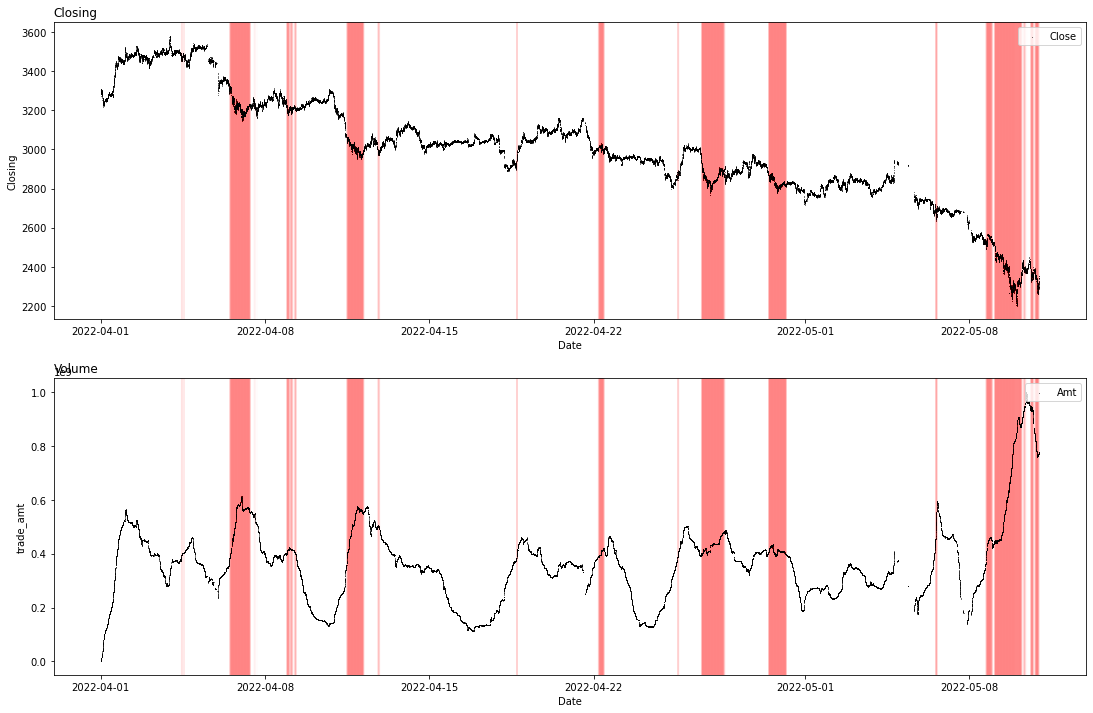

In [188]:
# setting up the axes
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(18.5, 12)

# Use some parameters
Volume= 390
Drop = 0.032
Vol = 0.036

# Compute dates for max choice
Dat = Out_All[(Out_All['Vol_24h'] >= Volume*1000000) &
              (Out_All['close_price'] / Out_All['High_24'] - 1 <= -Drop) &
              (Out_All['HL15'] >= Vol)]['start_timestamp']

axs[0].set_title('Closing', loc = 'left')
axs[0].set_ylabel('Closing')
axs[0].set_xlabel('Date')
axs[0].scatter(Out_All['start_timestamp'], Out_All['close_price'], color = "black", s=0.1, lw = 0.5, label = 'Close')
[axs[0].axvline(x=i, lw = 0.05, alpha = 0.1, color = 'r') for i in Dat]
axs[0].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

axs[1].set_title('Volume', loc = 'left' )
axs[1].set_ylabel('trade_amt')
axs[1].set_xlabel('Date')
axs[1].scatter(Out_All['start_timestamp'], Out_All['Vol_24h'], color = "black", s=0.1, lw = 0.5, label = 'Amt')
[axs[1].axvline(x=i, lw = 0.05, alpha = 0.1, color = 'r') for i in Dat]
axs[1].legend(loc='upper right')
# axs[1].set_ylim([0,10000])

$\text{24h Volume} \ge Vol$

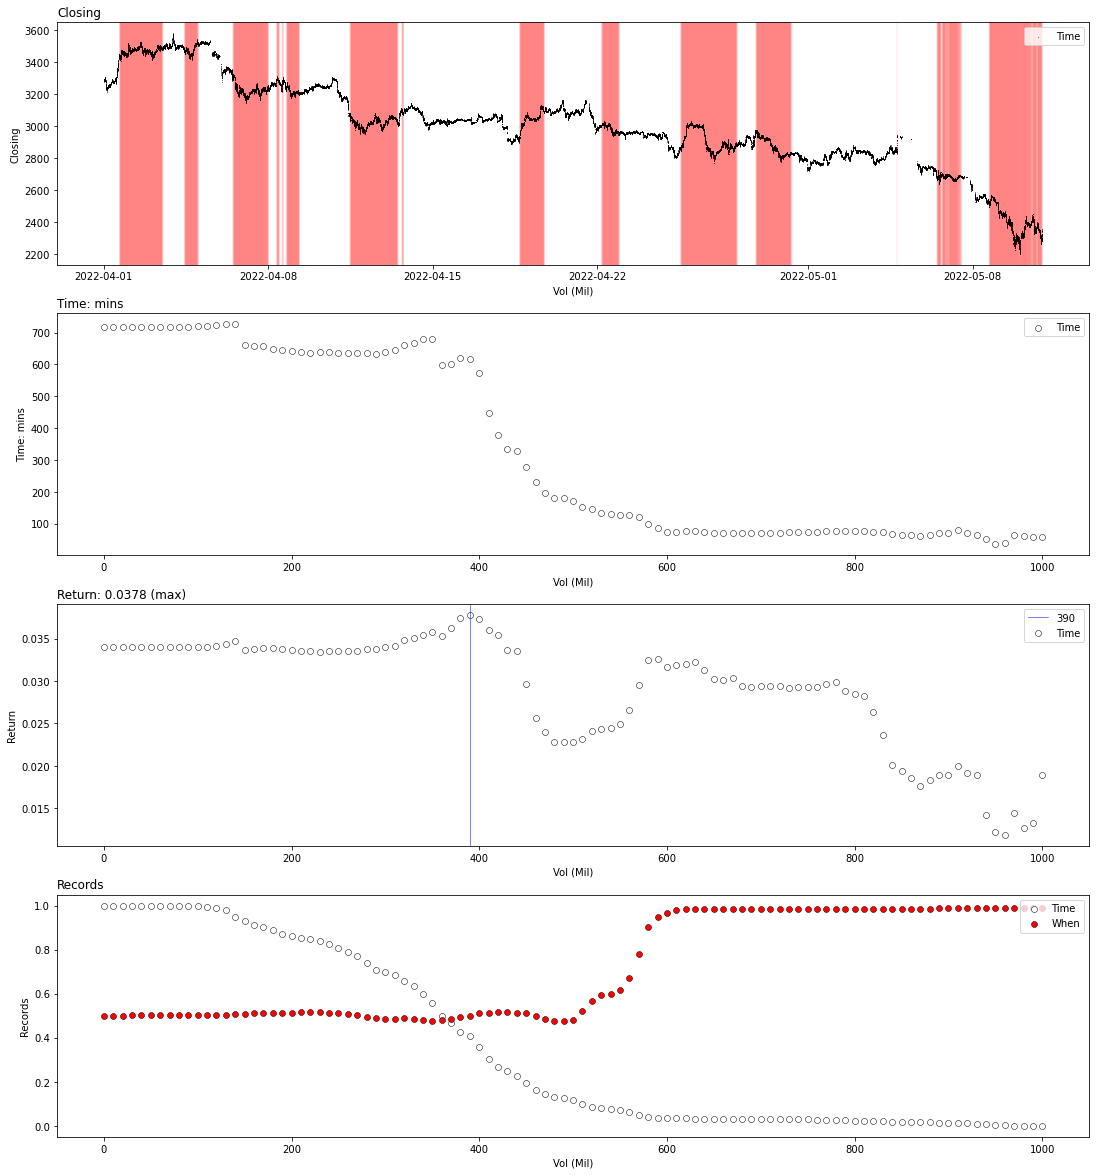

In [164]:
# setting up the axes
fig, axs = plt.subplots(4, 1)
fig.set_size_inches(18.5, 20.5)

# Compute a max level for info
Max = np.max(Return_Vol)
Pos = Stress_vol[Return_Vol == Max][0]

# Compute dates for max choice
Dat = Out_All[Out_All['Vol_24h'] >= Pos*1000000]['start_timestamp']

axs[0].set_title('Closing', loc = 'left' )
axs[0].set_ylabel('Closing')
axs[0].set_xlabel('Vol (Mil)')
axs[0].scatter(Out_All['start_timestamp'], Out_All['close_price'], color = "black", s=0.1, lw = 0.5, label = 'Time')
[axs[0].axvline(x=i, lw = 0.1, alpha = 0.1, color = 'r') for i in Dat]
axs[0].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

axs[1].set_title('Time: mins', loc = 'left' )
axs[1].set_ylabel('Time: mins')
axs[1].set_xlabel('Vol (Mil)')
axs[1].scatter(Stress_vol, Time_Vol, color = "white", ec = 'black', lw = 0.5, label = 'Time')
axs[1].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

axs[2].set_title('Return: ' + str(round(Max,4))+ ' (max)', loc = 'left' )
axs[2].set_ylabel('Return')
axs[2].set_xlabel('Vol (Mil)')
axs[2].scatter(Stress_vol, Return_Vol, color = "white", ec = 'black', lw = 0.5, label = 'Time')
axs[2].axvline(x=Pos, lw = 0.5, alpha = 1, color = 'b', label = str(Pos))
axs[2].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

axs[3].set_title('Records', loc = 'left' )
axs[3].set_ylabel('Records')
axs[3].set_xlabel('Vol (Mil)')
axs[3].scatter(Stress_vol, Records_Vol, color = "white", ec = 'black', lw = 0.5, label = 'Time')
axs[3].scatter(Stress_vol, When_Vol, color = "red", ec = 'black', lw = 0.5, label = 'When')
# axs[0].axvline(x=mean, lw = 2, alpha = 1, color = 'r', label = 'Mean')
axs[3].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

Rule : $\frac{current}{24h high} \le -x$

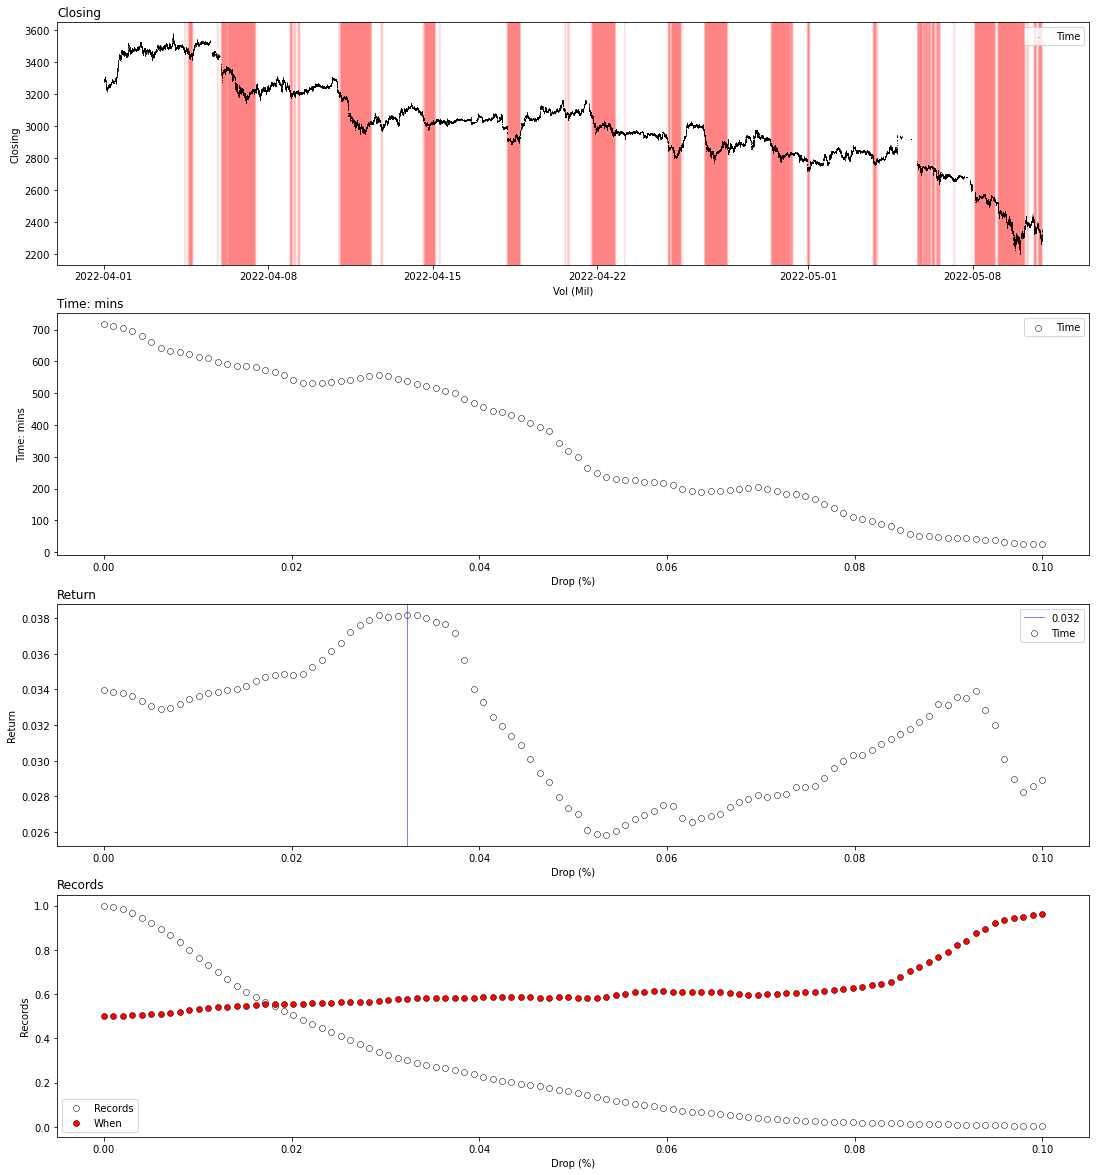

In [166]:
# setting up the axes
fig, axs = plt.subplots(4, 1)
fig.set_size_inches(18.5, 20.5)

# Compute a max level for info
Max = np.max(Return_Drop)
Pos = Stress_Threshold[Return_Drop == Max][0]

# Compute dates for max choice
Dat = Out_All[Out_All['close_price'] / Out_All['High_24'] - 1 <= -Pos]['start_timestamp']


axs[0].set_title('Closing', loc = 'left' )
axs[0].set_ylabel('Closing')
axs[0].set_xlabel('Vol (Mil)')
axs[0].scatter(Out_All['start_timestamp'], Out_All['close_price'], color = "black", s=0.1, lw = 0.5, label = 'Close')
[axs[0].axvline(x=i, lw = 0.1, alpha = 0.1, color = 'r') for i in Dat]
axs[0].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

axs[1].set_title('Time: mins', loc = 'left' )
axs[1].set_ylabel('Time: mins')
axs[1].set_xlabel('Drop (%)')
axs[1].scatter(Stress_Threshold, Time_Drop, color = "white", ec = 'black', lw = 0.5, label = 'Time')
# axs[0].axvline(x=mean, lw = 2, alpha = 1, color = 'r', label = 'Mean')
axs[1].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

axs[2].set_title('Return', loc = 'left' )
axs[2].set_ylabel('Return')
axs[2].set_xlabel('Drop (%)')
axs[2].scatter(Stress_Threshold, Return_Drop, color = "white", ec = 'black', lw = 0.5, label = 'Time')
axs[2].axvline(x=Pos, lw = 0.5, alpha = 1, color = 'b', label = str(round(Pos,3)))
axs[2].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

axs[3].set_title('Records', loc = 'left' )
axs[3].set_ylabel('Records')
axs[3].set_xlabel('Drop (%)')
axs[3].scatter(Stress_Threshold, Records_Drop, color = "white", ec = 'black', lw = 0.5, label = 'Records')
axs[3].scatter(Stress_Threshold, When_Drop, color = "red", ec = 'black', lw = 0.5, label = 'When')
# axs[0].axvline(x=mean, lw = 2, alpha = 1, color = 'r', label = 'Mean')
axs[3].legend(loc='lower left')
# axs[0].set_xlim([-0.01,0.2])

Rule : $\frac{15m_{High} - 15m_{Low}}{15m_{High}} \ge x$

In [170]:
Out_All[(Out_All['HL15'] >= Pos)]['start_timestamp']

797     2022-04-01 13:17:00
798     2022-04-01 13:18:00
799     2022-04-01 13:19:00
800     2022-04-01 13:20:00
801     2022-04-01 13:21:00
                ...        
54941   2022-05-10 23:07:00
54942   2022-05-10 23:08:00
54943   2022-05-10 23:09:00
54944   2022-05-10 23:11:00
54945   2022-05-10 23:21:00
Name: start_timestamp, Length: 24993, dtype: datetime64[ns]

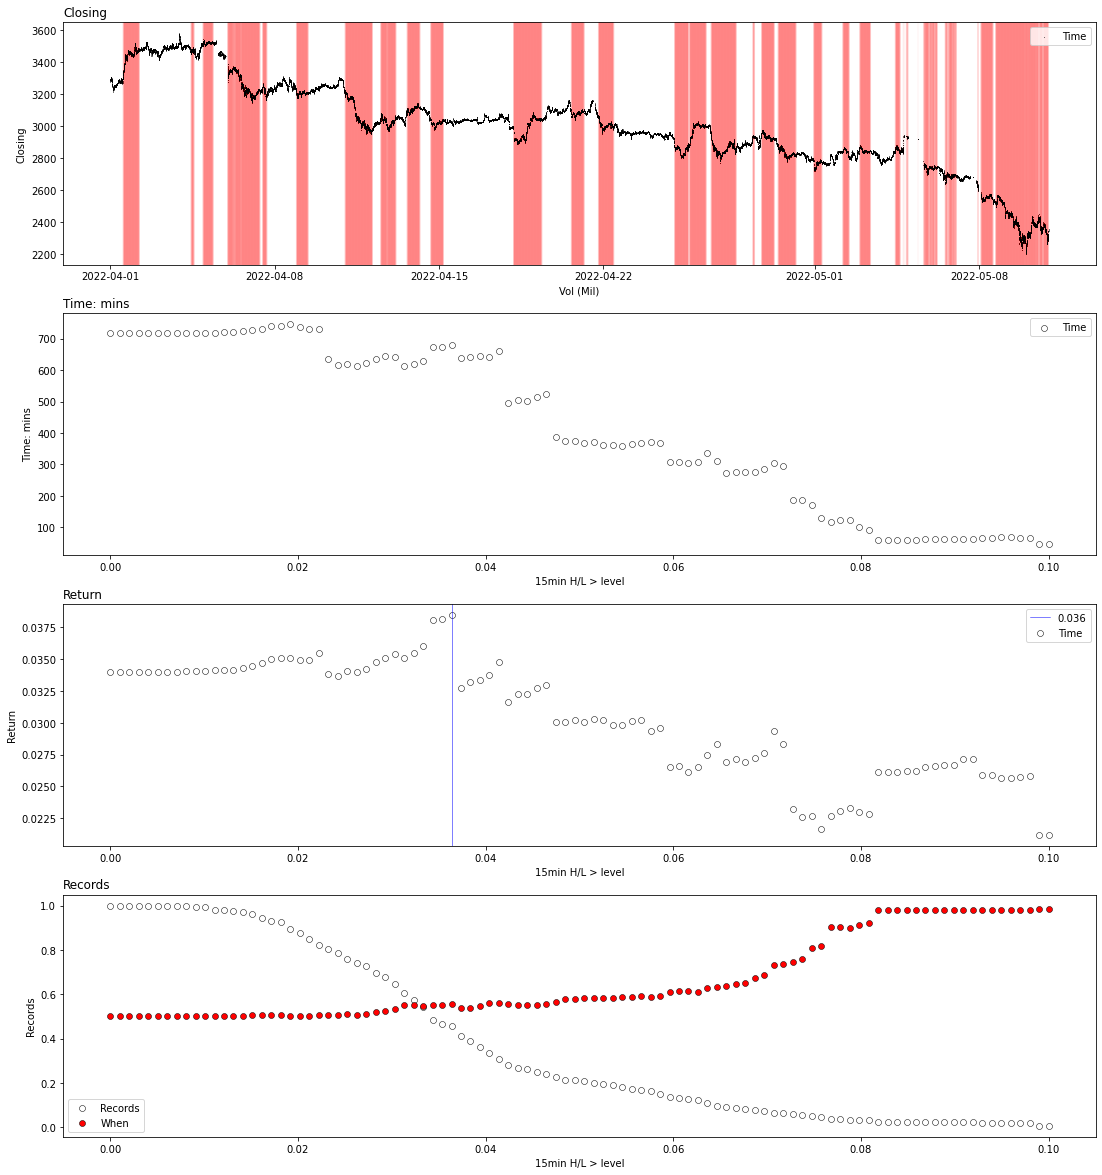

In [172]:
# setting up the axes
fig, axs = plt.subplots(4, 1)
fig.set_size_inches(18.5, 20.5)

# Compute a max level for info
Max = np.max(Return_15)
Pos = Stress_15[Return_15 == Max][0]

# Compute dates for max choice
Dat = Out_All[(Out_All['HL15'] >= Pos)]['start_timestamp']


axs[0].set_title('Closing', loc = 'left' )
axs[0].set_ylabel('Closing')
axs[0].set_xlabel('Vol (Mil)')
axs[0].scatter(Out_All['start_timestamp'], Out_All['close_price'], color = "black", s=0.1, lw = 0.5, label = 'Time')
[axs[0].axvline(x=i, lw = 0.1, alpha = 0.1, color = 'r') for i in Dat]
axs[0].legend(loc='upper right')


axs[1].set_title('Time: mins', loc = 'left' )
axs[1].set_ylabel('Time: mins')
axs[1].set_xlabel('15min H/L > level')
axs[1].scatter(Stress_15, Time_15, color = "white", ec = 'black', lw = 0.5, label = 'Time')
# axs[0].axvline(x=mean, lw = 2, alpha = 1, color = 'r', label = 'Mean')
axs[1].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

axs[2].set_title('Return', loc = 'left' )
axs[2].set_ylabel('Return')
axs[2].set_xlabel('15min H/L > level')
axs[2].scatter(Stress_15, Return_15, color = "white", ec = 'black', lw = 0.5, label = 'Time')
axs[2].axvline(x=Pos, lw = 0.5, alpha = 1, color = 'b', label = str(round(Pos,3)))
axs[2].legend(loc='upper right')
# axs[0].set_xlim([-0.01,0.2])

axs[3].set_title('Records', loc = 'left' )
axs[3].set_ylabel('Records')
axs[3].set_xlabel('15min H/L > level')
axs[3].scatter(Stress_15, Records_15, color = "white", ec = 'black', lw = 0.5, label = 'Records')
axs[3].scatter(Stress_15, When_15, color = "red", ec = 'black', lw = 0.5, label = 'When')
# axs[0].axvline(x=mean, lw = 2, alpha = 1, color = 'r', label = 'Mean')
axs[3].legend(loc='lower left')
# axs[0].set_xlim([-0.01,0.2])